In this report we will explore a dataset utilizing lasso and ridge regression to determine how different lambda values effect our results

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [2]:
# Load the data again. Keep air quality data, drop the index column
# and any missing data columns.
df = pd.read_csv(
    'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv'
).iloc[:,1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Make some new features to capture potential quadratic and cubic
# relationships between solar radiation and day or temperature.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]


In [3]:
# Small number of parameters.
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

# Large number of parameters.
lassBig = linear_model.Lasso(alpha=.35)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)

R² for the model with few features:
0.450062579301185

Parameter estimates for the model with few features:
[-0.         -0.40657726 -0.          0.00114596]

R² for the model with many features:
0.44363376712897096

Parameter estimates for the model with many features:
[ 0.00000000e+00 -3.89351238e-01  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -2.77688887e-04
 -7.09158792e-07  3.48711577e+00]


In [4]:
print(lass.score(X_test, Y_test))

print(lassBig.score(X_test2, Y_test))

0.44553225151184195
0.4380466345914476


__Create a plot below of how  R2
  varies across different values of  λ
  for ridge and lasso regression. Use logic and code similar to the ridge regression demonstration above, and base your plot on the X_train2 feature set.
Do lasso and ridge yield the same  R2
  for a given lambda value?__

Let's start by creating a for loop and fitting a ridge regression model to iterate over a range of lambda values so we can visualize the effects.

[0.5739722663409328, 0.5739720657073657, 0.5739717725978908, 0.5739714114491397, 0.5739710008243096, 0.5739705549005701, 0.5739700845517021, 0.5739695981427166, 0.5739691021194754]


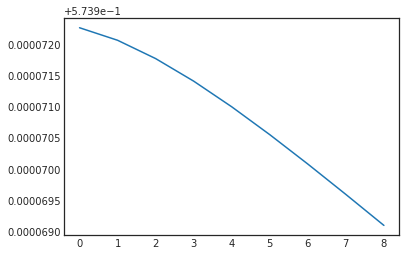

In [5]:
ridge_scores =[]
x = np.arange(.1, 1, .1)
for xi in x:
    ridge = linear_model.Ridge(alpha=xi, fit_intercept = False)
    ridge.fit(X_train2, Y_train)
    rscore = ridge.score(X_train2, Y_train)
    ridge_scores.append(rscore)
print(ridge_scores)
plt.plot(ridge_scores);

The data is remaining consistent with 57.4% of the variance being explained across the range of lambda values.

Let's recreate the experiment utilizing a lasso regression model this time.

[0.5630894936716484, 0.5312352331355782, 0.4781445089581402, 0.403814855530392, 0.3082496073309633, 0.1914467410568793, 0.05340781434063302, 0.026834134749037727, 0.026834134561415365]


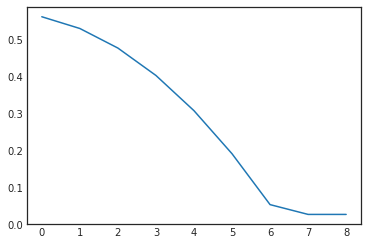

In [6]:
lass_scores =[]
for xi in x:
    lassBig = linear_model.Lasso(alpha=xi)
    lassBig.fit(X_train2, Y_train)
    rscore = lassBig.score(X_train2, Y_train)
    lass_scores.append(rscore)
print(lass_scores)
plt.plot(lass_scores);

There is a large range of variance being explained based on the lambda value being selected with lasso regresson. Our lasso regression model ranges from .02% of the variance being explained all the way up to 56.3% of the variance.

In [7]:
compare = np.column_stack((lass_scores, ridge_scores))
prettycompare = np.array2string(
    compare,
    formatter={'float_kind':'{0:.3f}'.format})
print(prettycompare)

[[0.563 0.574]
 [0.531 0.574]
 [0.478 0.574]
 [0.404 0.574]
 [0.308 0.574]
 [0.191 0.574]
 [0.053 0.574]
 [0.027 0.574]
 [0.027 0.574]]


#### In conclusion
With this data set it is clear that ridge regression is a better model for theis data. Our ridge regression model stayed consistent throughout our test and performed even better than our lasso model at its prime.